In [136]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import config
api_key = config.api_key
import requests
from bs4 import BeautifulSoup
import re

# remove scientific notation display for floats
pd.set_option('display.float_format', lambda x: '%.5f' % x)

# WEBSCRAPPING TEST

In [269]:
test_ids = tmdb_df.loc[4100:4200].imdb_id

In [270]:
test_ids = test_ids.dropna()

In [271]:
def scrape_budget(imdb_id):
    url = 'https://www.imdb.com/title/'
    html_page = requests.get(url+imdb_id)
    soup = BeautifulSoup(html_page.content, 'html.parser')
    details = soup.find('div', id="titleDetails")
    budget = details.find(text=re.compile('Budget:'))
    try:
      return budget.parent.parent.contents[2]
    except:
      return "0"
results = []
for id in test_ids:
    results.append(scrape_budget(id))

In [272]:
results

['0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '$8,000,000\n            ',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 'EUR15,000,000\n            ',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 'EUR17,500,000\n            ',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '$100,000\n            ',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0']

In [273]:
for bud in tmdb_df.loc[4100:4200].budget:
    print(bud)

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
14947.0
0.0
8000000.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
878028.0
0.0
0.0
0.0
0.0
0.0
1862300.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
8772.0
0.0
0.0
0.0
0.0
3700000.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


# Data Sources and Notes:

## Box Office Mojo

### Box Office Mojo movie grosses

In [3]:
#read data
gross_bom = pd.read_csv('zippedData/bom.movie_gross.csv.gz', compression='gzip')
gross_bom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
title             3387 non-null object
studio            3382 non-null object
domestic_gross    3359 non-null float64
foreign_gross     2037 non-null object
year              3387 non-null int64
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


## Note: Not all movies have information for foreign gross earnings. To suplement foreign gross when not available we will use the ratio of the average (median) domestic to foreign gross, and then make a column for total gross earnings

In [4]:
# Foreign Gross is a string accounting for NaN.
# Creating foreign_release column in order to create expected foreign gross column.
gross_bom['no_foreign_release'] = gross_bom.foreign_gross.map(lambda x : pd.isnull(x))

In [5]:
print(gross_bom['no_foreign_release'].value_counts())
gross_bom.foreign_gross.isna().sum()

False    2037
True     1350
Name: no_foreign_release, dtype: int64


1350

In [6]:
# remove na rows from foreign_gross in order to calculate stats
no_na_foreign_gross = gross_bom.dropna(axis= 0, subset=['foreign_gross'])

In [7]:
# remove comma from string then convert to int
no_na_foreign_gross.foreign_gross = no_na_foreign_gross.foreign_gross.map(lambda val : int(float(val.replace(",", ""))))

/Users/kevinevans/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [8]:
no_na_foreign_gross.agg(['mean', 'median', 'std'])

,domestic_gross,foreign_gross,year,no_foreign_release
mean,46973114.37780,74872810.14973,2013.49288,0.00000
median,16500000.00000,18700000.00000,2013.00000,0.00000
std,81599661.10596,137410600.84191,2.59241,0.00000


In [9]:
# find ratio of domestic to foreign mean
no_na_foreign_gross.domestic_gross.mean()/no_na_foreign_gross.foreign_gross.mean()

0.6273721299342642

In [10]:
# find ratio of domestic to foreign median
no_na_foreign_gross.domestic_gross.median()/no_na_foreign_gross.foreign_gross.median()

0.8823529411764706

In [11]:
# set foreign_gross na's to 0 in order to do arithmetic operations
gross_bom.foreign_gross.fillna("0", inplace=True)

In [12]:
# convert foreign_gross strings to int
gross_bom.foreign_gross = gross_bom.foreign_gross.map(lambda val : int(float(val.replace(",", ""))))

In [13]:
no_na_data = {'dom_median': no_na_foreign_gross.domestic_gross.median(), 'foreign_median': no_na_foreign_gross.foreign_gross.median()}

In [14]:
def total_gross(no_foreign_release, domestic_gross, foreign_gross):
    if no_foreign_release:
        return domestic_gross*(no_na_data['foreign_median']/no_na_data['dom_median'])
    else:
        return domestic_gross + foreign_gross

In [15]:
gross_bom['total_gross'] = gross_bom.apply(lambda row : total_gross(row.no_foreign_release, row.domestic_gross, row.foreign_gross), axis=1)

In [16]:
gross_bom.loc[gross_bom.no_foreign_release == True].head()

,title,studio,domestic_gross,foreign_gross,year,no_foreign_release,total_gross
222,Flipped,WB,1800000.00000,0,2010,True,2040000.00000
254,The Polar Express (IMAX re-issue 2010),WB,673000.00000,0,2010,True,762733.33333
267,Tiny Furniture,IFC,392000.00000,0,2010,True,444266.66667
269,Grease (Sing-a-Long re-issue),Par.,366000.00000,0,2010,True,414800.00000
280,Last Train Home,Zeit.,288000.00000,0,2010,True,326400.00000


# <span style="color:blue"> Done: Make total gross column </span>

## IMDB
Note: foreign keys look like nconst is for Person Name, and tconst is for Movie Title

### IMDB Basic info by Name

In [17]:
name_basics_imdb = pd.read_csv('zippedData/imdb.name.basics.csv.gz', compression='gzip')
name_basics_imdb.head(1)

,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,nm0061671,Mary Ellen Bauder,nan,nan,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"


### IMDB some kind of info by Title
# <span style="color:red"> I think this is related to international releases? I can't tell yet </span>

In [18]:
title_imdb = pd.read_csv('zippedData/imdb.title.akas.csv.gz', compression='gzip')
title_imdb.head(2)

,title_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,NaN,NaN,0.00000
1,tt0369610,11,Jurashikku warudo,JP,NaN,imdbDisplay,NaN,0.00000


### IMDB Basic info by Title

In [19]:
title_basics_imdb = pd.read_csv('zippedData/imdb.title.basics.csv.gz', compression='gzip')
title_basics_imdb.head(1)

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.00000,"Action,Crime,Drama"


### Remove NaN rows from genres (as we are only looking at Animated films, we are not concerned with losing the data)

In [20]:
title_basics_imdb.dropna(axis= 0, subset=['genres'], inplace=True)

In [21]:
title_basics_imdb['is_animated'] = title_basics_imdb.apply(lambda row : 'Animation' in row.genres, axis=1)

## Create Animated Films DF

In [22]:
animated_films_df = title_basics_imdb.loc[title_basics_imdb['is_animated'] == True]

In [23]:
len(animated_films_df)

2799

## Create non-animated films for comparison

In [24]:
non_animated_films_df = title_basics_imdb.loc[title_basics_imdb['is_animated'] == False]

In [25]:
len(non_animated_films_df)

137937

### IMDB Crew (Writers and Directors)
This looks to be a connecting table

In [26]:
crew_imdb = pd.read_csv('zippedData/imdb.title.crew.csv.gz', compression='gzip')
crew_imdb.head(1)

,tconst,directors,writers
0,tt0285252,nm0899854,nm0899854


### IMDB Principles
(Actors, directors, producers, editors, actress, composer, cinematographer, writer, self, production designer, archive footage, archive sound )

In [27]:
title_principals_imdb = pd.read_csv('zippedData/imdb.title.principals.csv.gz', compression='gzip')
title_principals_imdb.head(1)

,tconst,ordering,nconst,category,job,characters
0,tt0111414,1,nm0246005,actor,NaN,"[""The Man""]"


### IMDB Rating
Key for titles along with rating and number of votes

In [28]:
title_ratings_imdb = pd.read_csv('zippedData/imdb.title.ratings.csv.gz', compression='gzip')
title_ratings_imdb.head(1)

,tconst,averagerating,numvotes
0,tt10356526,8.30000,31


## Rotten Tomatos

### Rotten Tomatos info
# <span style="color:red">  Note: No title, assuming id links to title somewhere</span>

In [29]:
info_rotten_tom = pd.read_csv('zippedData/rt.movie_info.tsv.gz', delimiter='\t', compression='gzip')
info_roten_tom.head(1)

NameError: name 'info_roten_tom' is not defined

### Rotten Tomatos Reviews
# <span style="color:red">  Note: Also no titles, assuming id links to title but don't seem to have that data</span>

In [30]:
reviews_rotten_tom = pd.read_csv('zippedData/rt.reviews.tsv.gz', delimiter='\t', compression='gzip', encoding="cp1252")
reviews_rotten_tom.head(1)

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"


## The Movie DataBase

### TMDB info

In [31]:
movies_movie_db = pd.read_csv('zippedData/tmdb.movies.csv.gz', compression='gzip')
# movies_movie_db.loc[movies_movie_db['id']==1]
movies_movie_db

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.53300,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.70000,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.73400,2010-03-26,How to Train Your Dragon,7.70000,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.51500,2010-05-07,Iron Man 2,6.80000,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.00500,1995-11-22,Toy Story,7.90000,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.92000,2010-07-16,Inception,8.30000,22186
...,...,...,...,...,...,...,...,...,...,...
26512,26512,"[27, 18]",488143,en,Laboratory Conditions,0.60000,2018-10-13,Laboratory Conditions,0.00000,1
26513,26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.60000,2018-05-01,_EXHIBIT_84xxx_,0.00000,1
26514,26514,"[14, 28, 12]",381231,en,The Last One,0.60000,2018-10-01,The Last One,0.00000,1
26515,26515,"[10751, 12, 28]",366854,en,Trailer Made,0.60000,2018-06-22,Trailer Made,0.00000,1


In [57]:
# movies_movie_db.loc[movies_movie_db.genre_ids == [16]]
TMDB_movies_df = movies_movie_db[movies_movie_db['genre_ids'].str.contains('16')]

### TMDB budgets
# <span style="color:red"> What does the ID mean? </span>

In [58]:
movie_budgets = pd.read_csv('zippedData/tn.movie_budgets.csv.gz', compression='gzip')
movie_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [59]:
movie_budgets.production_budget = movie_budgets.production_budget.map(lambda budget : int(budget.replace('$', '').replace(',', '')))

In [60]:
movie_budgets.worldwide_gross = movie_budgets.worldwide_gross.map(lambda budget : int(budget.replace('$', '').replace(',', '')))

# Combining DF containing name and genre with DF containing budgets and returns

In [62]:
TMDB_merge_df = pd.merge(TMDB_movies_df, movie_budgets, how='inner', left_on='title'.lower(), right_on='movie'.lower())

In [63]:
TMDB_merge_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149 entries, 0 to 148
Data columns (total 16 columns):
Unnamed: 0           149 non-null int64
genre_ids            149 non-null object
id_x                 149 non-null int64
original_language    149 non-null object
original_title       149 non-null object
popularity           149 non-null float64
release_date_x       149 non-null object
title                149 non-null object
vote_average         149 non-null float64
vote_count           149 non-null int64
id_y                 149 non-null int64
release_date_y       149 non-null object
movie                149 non-null object
production_budget    149 non-null int64
domestic_gross       149 non-null object
worldwide_gross      149 non-null int64
dtypes: float64(2), int64(6), object(8)
memory usage: 19.8+ KB


In [465]:
animated_merge_df = pd.merge(animated_films_df, movie_budgets, how='inner', left_on='primary_title'.lower(), right_on='movie'.lower())


In [466]:
animated_merge_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 148 entries, 0 to 147
Data columns (total 13 columns):
tconst               148 non-null object
primary_title        148 non-null object
original_title       148 non-null object
start_year           148 non-null int64
runtime_minutes      137 non-null float64
genres               148 non-null object
is_animated          148 non-null bool
id                   148 non-null int64
release_date         148 non-null object
movie                148 non-null object
production_budget    148 non-null int64
domestic_gross       148 non-null object
worldwide_gross      148 non-null int64
dtypes: bool(1), float64(1), int64(4), object(7)
memory usage: 15.2+ KB


In [462]:
non_animated_merge_df = pd.merge(non_animated_films_df, movie_budgets, how='inner', left_on='primary_title'.lower(), right_on='movie'.lower())

In [449]:
animated_merge_df.loc[animated_merge_df.production_budget == animated_merge_df.production_budget.max()]

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,is_animated,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
1,tt0398286,Tangled,Tangled,2010,100.00000,"Adventure,Animation,Comedy",True,15,"Nov 24, 2010",Tangled,260000000,"$200,821,936",586477240


In [ ]:
animated_merge_df.loc[animated_merge_df.production_budget == animated_merge_df.production_budget.max()]

In [467]:
len(animated_merge_df)

148

## Initial plot of budget to world wide gross for animated films:

In [446]:
animated_merge_df.production_budget.max()

260000000

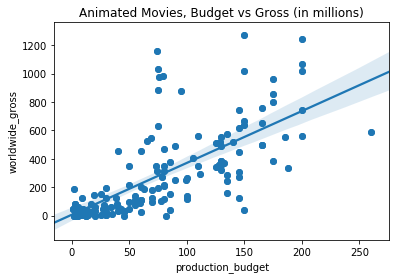

In [458]:
fig, ax = plt.subplots()
animated_scatter = ax.scatter(animated_merge_df['production_budget']/1e6, animated_merge_df['worldwide_gross']/1e6)
ax.set_xlabel("Production Budget (M)")
ax.set_ylabel("Worldwide Gross (M)")
ax.set_title("Animated Movies, Budget vs Gross (in millions)")
sns.regplot(animated_merge_df['production_budget']/1e6, animated_merge_df['worldwide_gross']/1e6)

## Initial plot of budget to world wide gross for non-animated films:

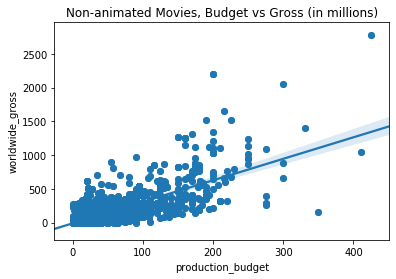

In [457]:
fig, ax = plt.subplots()
ax.scatter(non_animated_merge_df['production_budget']/1e6, non_animated_merge_df['worldwide_gross']/1e6)
ax.set_xlabel("Production Budget (M)")
ax.set_ylabel("Worldwide Gross (M)")
ax.set_title("Non-animated Movies, Budget vs Gross (in millions)")
sns.regplot(non_animated_merge_df['production_budget']/1e6, non_animated_merge_df['worldwide_gross']/1e6)

# TMDB API Results

In [5]:
def call_TMDB_api(page):
    return requests.get('https://api.themoviedb.org/3/discover/movie?api_key=' +  api_key + '&with_genres=16&page='+ page).json()['results']

first_call = requests.get('https://api.themoviedb.org/3/discover/movie?api_key=' +  api_key + '&with_genres=16')
num_pages = first_call.json()['total_pages']

In [6]:
# commenting this out so I don't accidentally make another 500 api calls
# results = []
# for i in range(num_pages):
#     results += call_TMDB_api(str(i+1))

In [12]:
import datetime
second_thousand_ids = results[1000:2000]

In [8]:
def turn_response_into_list(response):
    details = []
    for movie in response:
        details.append(requests.get('https://api.themoviedb.org/3/movie/'+ str(movie['id']) +'?api_key='+ api_key).json())
    return details

In [11]:
print(datetime.datetime.now())
first_thousand_movies = turn_response_into_list(first_thousand_ids)
print(datetime.datetime.now())

2020-05-27 11:59:39.218474
2020-05-27 12:02:06.813763


In [133]:
second_thousand_movies[10]

{'adult': False,
 'backdrop_path': '/zNGe2UHloFU0RXMyLukhhMAUi14.jpg',
 'belongs_to_collection': None,
 'budget': 0,
 'genres': [{'id': 16, 'name': 'Animation'}, {'id': 35, 'name': 'Comedy'}],
 'homepage': '',
 'id': 13158,
 'imdb_id': 'tt0455326',
 'original_language': 'en',
 'original_title': 'Aqua Teen Hunger Force Colon Movie Film for Theaters',
 'overview': 'An action epic that explores the origins of the Aqua Teen Hunger Force (better known as Master Shake, Frylock, and Meatwad,) who somehow become pitted in a battle over an immortal piece of exercise equipment.',
 'popularity': 7.294,
 'poster_path': '/q3Ln4x4rv4nJsBBfukjvH2wiU28.jpg',
 'production_companies': [{'id': 6759,
   'logo_path': None,
   'name': 'Adult Swim',
   'origin_country': ''},
  {'id': 6760,
   'logo_path': None,
   'name': 'Williams Street',
   'origin_country': 'US'},
  {'id': 13534,
   'logo_path': None,
   'name': 'First Look Pictures',
   'origin_country': 'US'},
  {'id': 33423,
   'logo_path': '/6HRO4RN1

In [13]:
print(datetime.datetime.now())
second_thousand_movies = turn_response_into_list(second_thousand_ids)
print(datetime.datetime.now())

2020-05-27 12:03:22.472310
2020-05-27 12:05:10.783430


In [14]:
third_thousand_ids = results[2000:3000]
print(datetime.datetime.now())
third_thousand_movies = turn_response_into_list(third_thousand_ids)
print(datetime.datetime.now())

2020-05-27 12:05:53.995817
2020-05-27 12:08:04.097588


In [15]:
fourth_thousand_ids = results[3000:4000]
print(datetime.datetime.now())
fourth_thousand_movies = turn_response_into_list(fourth_thousand_ids)
print(datetime.datetime.now())

2020-05-27 12:08:09.673125
2020-05-27 12:10:17.673599


In [16]:
fifth_thousand_ids = results[4000:5000]
print(datetime.datetime.now())
fifth_thousand_movies = turn_response_into_list(fifth_thousand_ids)
print(datetime.datetime.now())

2020-05-27 12:10:23.630532
2020-05-27 12:12:44.880054


In [20]:
sixth_thousand_ids = results[5000:6000]
print(datetime.datetime.now())
sixth_thousand_movies = turn_response_into_list(sixth_thousand_ids)
print(datetime.datetime.now())

2020-05-27 12:14:25.385990
2020-05-27 12:16:56.708930


In [23]:
seventh_thousand_ids = results[6000:7000]
print(datetime.datetime.now())
seventh_thousand_movies = turn_response_into_list(seventh_thousand_ids)
print(datetime.datetime.now())

2020-05-27 12:18:30.815519
2020-05-27 12:20:54.090259


In [24]:
eighth_thousand_ids = results[7000:8000]
print(datetime.datetime.now())
eighth_thousand_movies = turn_response_into_list(eighth_thousand_ids)
print(datetime.datetime.now())

2020-05-27 12:20:59.505048
2020-05-27 12:23:29.513210


In [25]:
ninth_thousand_ids = results[8000:9000]
print(datetime.datetime.now())
ninth_thousand_movies = turn_response_into_list(ninth_thousand_ids)
print(datetime.datetime.now())

2020-05-27 12:23:34.882220
2020-05-27 12:26:15.777246


In [26]:
tenth_thousand_ids = results[9000:10000]
print(datetime.datetime.now())
tenth_thousand_movies = turn_response_into_list(tenth_thousand_ids)
print(datetime.datetime.now())

2020-05-27 12:26:21.080310
2020-05-27 12:28:48.919695


In [27]:
all_movies = first_thousand_movies + second_thousand_movies + third_thousand_movies + fourth_thousand_movies + fifth_thousand_movies + sixth_thousand_movies + seventh_thousand_movies + eighth_thousand_movies + ninth_thousand_movies + tenth_thousand_movies


In [ ]:
# TMDB_results = turn_response_into_list(results)

In [28]:
keys = all_movies[1].keys()

In [36]:
tmdb_data = pd.DataFrame(all_movies, columns = keys)
tmdb_data.columns

Index(['adult', 'backdrop_path', 'belongs_to_collection', 'budget', 'genres',
       'homepage', 'id', 'imdb_id', 'original_language', 'original_title',
       'overview', 'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')

In [33]:
tmdb_data.to_csv('tmdb_animation.csv')

In [159]:
test_data = pd.DataFrame(details, columns= keys)

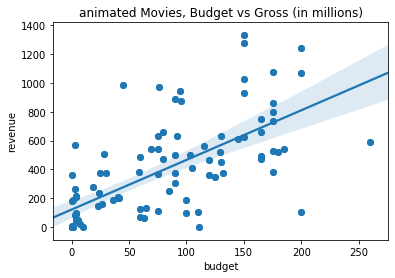

In [169]:
fig, ax = plt.subplots()
ax.scatter(test_df['budget']/1e6, test_df['revenue']/1e6)
ax.set_xlabel("Production Budget (M)")
ax.set_ylabel("Worldwide Gross (M)")
ax.set_title("animated Movies, Budget vs Gross (in millions)")
sns.regplot(test_df['budget']/1e6, test_df['revenue']/1e6)

# Import new csv from what we made up there ^^^

In [113]:
tmdb_df = pd.read_csv('tmdb_animation.csv', index_col=None, header=0, engine='python' )
# tmdb_df.dropna(axis=0, subset=['budget'], inplace=True)

In [119]:
tmdb_df.dropna(axis=0, subset=['revenue'], inplace=True)

## Drop rows where revenue is 0

In [120]:
len(tmdb_df)

9990

In [121]:
tmdb_df.dropna(axis=0, subset=['budget'], inplace=True)

In [124]:
len(tmdb_df)

False

In [129]:
tmdb_df.budget.value_counts()

0.0           9249
10000000.0      29
3500000.0       20
30000000.0      19
20000000.0      18
              ... 
12516654.0       1
4.0              1
78000000.0       1
38.0             1
47000000.0       1
Name: budget, Length: 341, dtype: int64

In [128]:
tmdb_df.budget = tmdb_df.budget.map(lambda num : int(num))

ValueError: invalid literal for int() with base 10: '0.0'

Turn budget to int.

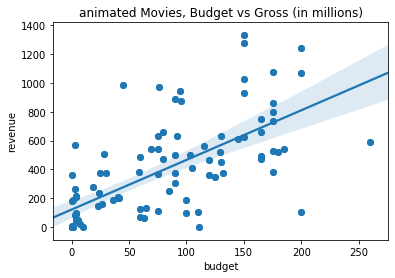

In [169]:
fig, ax = plt.subplots()
ax.scatter(test_df['budget']/1e6, test_df['revenue']/1e6)
ax.set_xlabel("Production Budget (M)")
ax.set_ylabel("Worldwide Gross (M)")
ax.set_title("animated Movies, Budget vs Gross (in millions)")
sns.regplot(test_df['budget']/1e6, test_df['revenue']/1e6)

In [225]:
tmdb_df.revenue.value_counts()

0.00000            9392
12000000.00000        4
3800000.00000         2
1000000.00000         2
14800000.00000        2
                   ... 
8821329.00000         1
223839.00000          1
106209378.00000       1
455815.00000          1
314432665.00000       1
Name: revenue, Length: 586, dtype: int64

In [77]:
tmdb_df = tmdb_df[tmdb_df.revenue != 0]

In [82]:
tmdb_df.dropna(axis=0, subset=['budget'], inplace=True)
tmdb_df.budget.isna().values.any()

/Users/kevinevans/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


False

In [90]:
tmdb_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 598 entries, 1 to 9954
Data columns (total 26 columns):
Unnamed: 0               598 non-null object
adult                    598 non-null object
backdrop_path            546 non-null object
belongs_to_collection    263 non-null object
budget                   598 non-null object
genres                   598 non-null object
homepage                 316 non-null object
id                       598 non-null float64
imdb_id                  589 non-null object
original_language        598 non-null object
original_title           598 non-null object
overview                 595 non-null object
popularity               598 non-null object
poster_path              588 non-null object
production_companies     598 non-null object
production_countries     598 non-null object
release_date             598 non-null object
revenue                  598 non-null float64
runtime                  597 non-null float64
spoken_languages         598 non-nul

Text(0.5, 1.0, 'animated Movies, Budget vs Gross (in millions)')

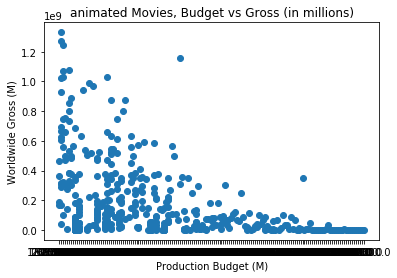

In [83]:
fig, ax = plt.subplots()
ax.scatter(tmdb_df['budget'], tmdb_df['revenue'])
ax.set_xlabel("Production Budget (M)")
ax.set_ylabel("Worldwide Gross (M)")
ax.set_title("animated Movies, Budget vs Gross (in millions)")
# sns.regplot(tmdb_df['budget']/1e6, tmdb_df['revenue']/1e6)